## Introduzione

### Descrizione del Dataset

Il [dataset](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) si compone di 1885 occorrenze, una per ogni intervistato, relativamente alla frequenza di utilizzo delle 18 droghe (legali e non) proposte.
Sono inoltre presenti alcuni dati statistici relativi alla persona intervistata come età, sesso, nazionalità, etnia e diversi indici di personalità.

### Dipendenze

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.formula.api import ols, logit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


### Acquisizione Dati

In [41]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('drug_consumption.data', header=None)
drugs_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
person_labels = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
data.columns = ['ID'] + person_labels + drugs_labels

Di seguito è mostrata la struttura del dataset

In [42]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Pre-processing dei dati

#### Valori duplicati

Il dataset non presenta record duplicati, il che è confermato dal codice di seguito il quale mostra che, dopo aver rimosso eventuali record duplicati, abbiamo sempre 1885 occorrenze.

In [44]:
#check duplicate records
data.drop_duplicates().count()

ID           1885
Age          1885
Gender       1885
Education    1885
Country      1885
Ethnicity    1885
Nscore       1885
Escore       1885
Oscore       1885
Ascore       1885
Cscore       1885
Impulsive    1885
SS           1885
Alcohol      1885
Amphet       1885
Amyl         1885
Benzos       1885
Caff         1885
Cannabis     1885
Choc         1885
Coke         1885
Crack        1885
Ecstasy      1885
Heroin       1885
Ketamine     1885
Legalh       1885
LSD          1885
Meth         1885
Mushrooms    1885
Nicotine     1885
Semer        1885
VSA          1885
dtype: int64

#### Valori mancanti

Il dataset non ha nemmeno valori mancanti, come mostrato dal codice seguente

In [45]:
#check NA
data.isna().sum().sum()

0

#### Rimozione dati non attendibili

"Semer" è una droga fittizia, introdotta per scovare eventuali utenti disonesti.
Il seguente codice rimuove tutti i record in cui l'intervistato sostiene di far uso di questa droga inesistente

In [46]:
data = data[data['Semer'] == 'CL0']
len(data)

1877

Rimuoviamo la colonna relativa alla droga fittizia

In [47]:
data = data.drop('Semer', axis=1)
drugs_labels.remove('Semer')

#### Mappatura classi

Le classi relativi alla frequenza di utilizzo delle droghe sono valorizzate da 7 classi:
|  Value  |    Description   |
|---------|-------------------------|
|   CL0   |       Never Used        |
|   CL1   |  Used over a Decade Ago |
|   CL2   |    Used in Last Decade  |
|   CL3   |     Used in Last Year   | 
|   CL4   |     Used in Last Month  | 
|   CL5   |     Used in Last Week   | 
|   CL6   |     Used in Last Day    |

Dato che gli algoritmi lavorano meglio con i numeri interi piuttosto che con le stringhe, rimuoviamo la parte iniziale del valore

In [48]:
#convert classes into integer
data[drugs_labels] = data[drugs_labels].apply(lambda c: c.map(lambda x: int(x.lstrip('CL'))), axis=1)

In [49]:
for drug in drugs_labels:
    col_name = f'{drug}_user'
    data.insert(data.columns.get_loc(f'{drug}')+1, col_name, data[drug].isin([5, 6]).astype(int))

data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Alcohol_user,Amphet,Amphet_user,Amyl,Amyl_user,Benzos,Benzos_user,Caff,Caff_user,Cannabis,Cannabis_user,Choc,Choc_user,Coke,Coke_user,Crack,Crack_user,Ecstasy,Ecstasy_user,Heroin,Heroin_user,Ketamine,Ketamine_user,Legalh,Legalh_user,LSD,LSD_user,Meth,Meth_user,Mushrooms,Mushrooms_user,Nicotine,Nicotine_user,VSA,VSA_user
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,1,2,0,0,0,2,0,6,1,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,1,2,0,2,0,0,0,6,1,4,0,6,1,3,0,0,0,4,0,0,0,2,0,0,0,2,0,3,0,0,0,4,0,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,1,0,0,0,0,0,0,6,1,3,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,0,0,0,3,0,5,1,2,0,4,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,0,1,0,1,0,0,0,6,1,3,0,6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,1,0,0,0,0,0,0,4,0,5,1,4,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,1,0,0,0,0,0,0,5,1,3,0,4,0,0,0,0,0,2,0,0,0,0,0,3,0,5,1,4,0,4,0,5,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,0,6,1,5,1,5,1,6,1,6,1,6,1,4,0,0,0,4,0,0,0,2,0,0,0,2,0,0,0,2,0,6,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,1,0,0,0,0,0,0,6,1,6,1,5,1,0,0,0,0,3,0,0,0,0,0,3,0,3,0,0,0,3,0,4,0,0,0


In [50]:
drugs_columns  = [col for col in data.columns if any(col == drug_name + '_user' for drug_name in drugs_labels)]
# Aggiunta di una nuova colonna 'NumeroDroghe' al DataFrame
data['drugs_user_count'] = data[drugs_columns].sum(axis=1)

data['drugs_user_count']

0       3
1       3
2       2
3       1
4       2
       ..
1880    3
1881    4
1882    7
1883    4
1884    3
Name: drugs_user_count, Length: 1877, dtype: int64

### Esplorazione statistica

In [51]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Alcohol_user,Amphet,Amphet_user,Amyl,Amyl_user,Benzos,Benzos_user,Caff,Caff_user,Cannabis,Cannabis_user,Choc,Choc_user,Coke,Coke_user,Crack,Crack_user,Ecstasy,Ecstasy_user,Heroin,Heroin_user,Ketamine,Ketamine_user,Legalh,Legalh_user,LSD,LSD_user,Meth,Meth_user,Mushrooms,Mushrooms_user,Nicotine,Nicotine_user,VSA,VSA_user,drugs_user_count
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,943.079915,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,0.671817,1.337773,0.086308,0.606819,0.009057,1.461907,0.095365,5.484283,0.879595,2.980288,0.342568,5.109750,0.791156,1.156633,0.031433,0.295685,0.005860,1.309536,0.044752,0.372403,0.015450,0.564198,0.019712,1.353223,0.069792,1.053277,0.035695,0.826319,0.064465,1.177944,0.022376,3.194992,0.406500,0.429409,0.011188,3.603090
std,544.601919,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,0.469677,1.782384,0.280893,1.064005,0.094762,1.869193,0.293797,1.115119,0.325521,2.286778,0.474695,1.085716,0.406591,1.510791,0.174532,0.835925,0.076349,1.647373,0.206815,1.034761,0.123368,1.216341,0.139047,1.790881,0.254864,1.484582,0.185579,1.648379,0.245644,1.459212,0.147943,2.415814,0.491311,0.959160,0.105208,1.628521
min,1.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.000000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,944.000000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,3.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000
75%,1413.000000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,6.000000,1.000000,5.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,0.000000,0.000000,4.000000
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,1.000000,6.000000,1.000000,6.000000,1.000000,

### Esplorazione visuale

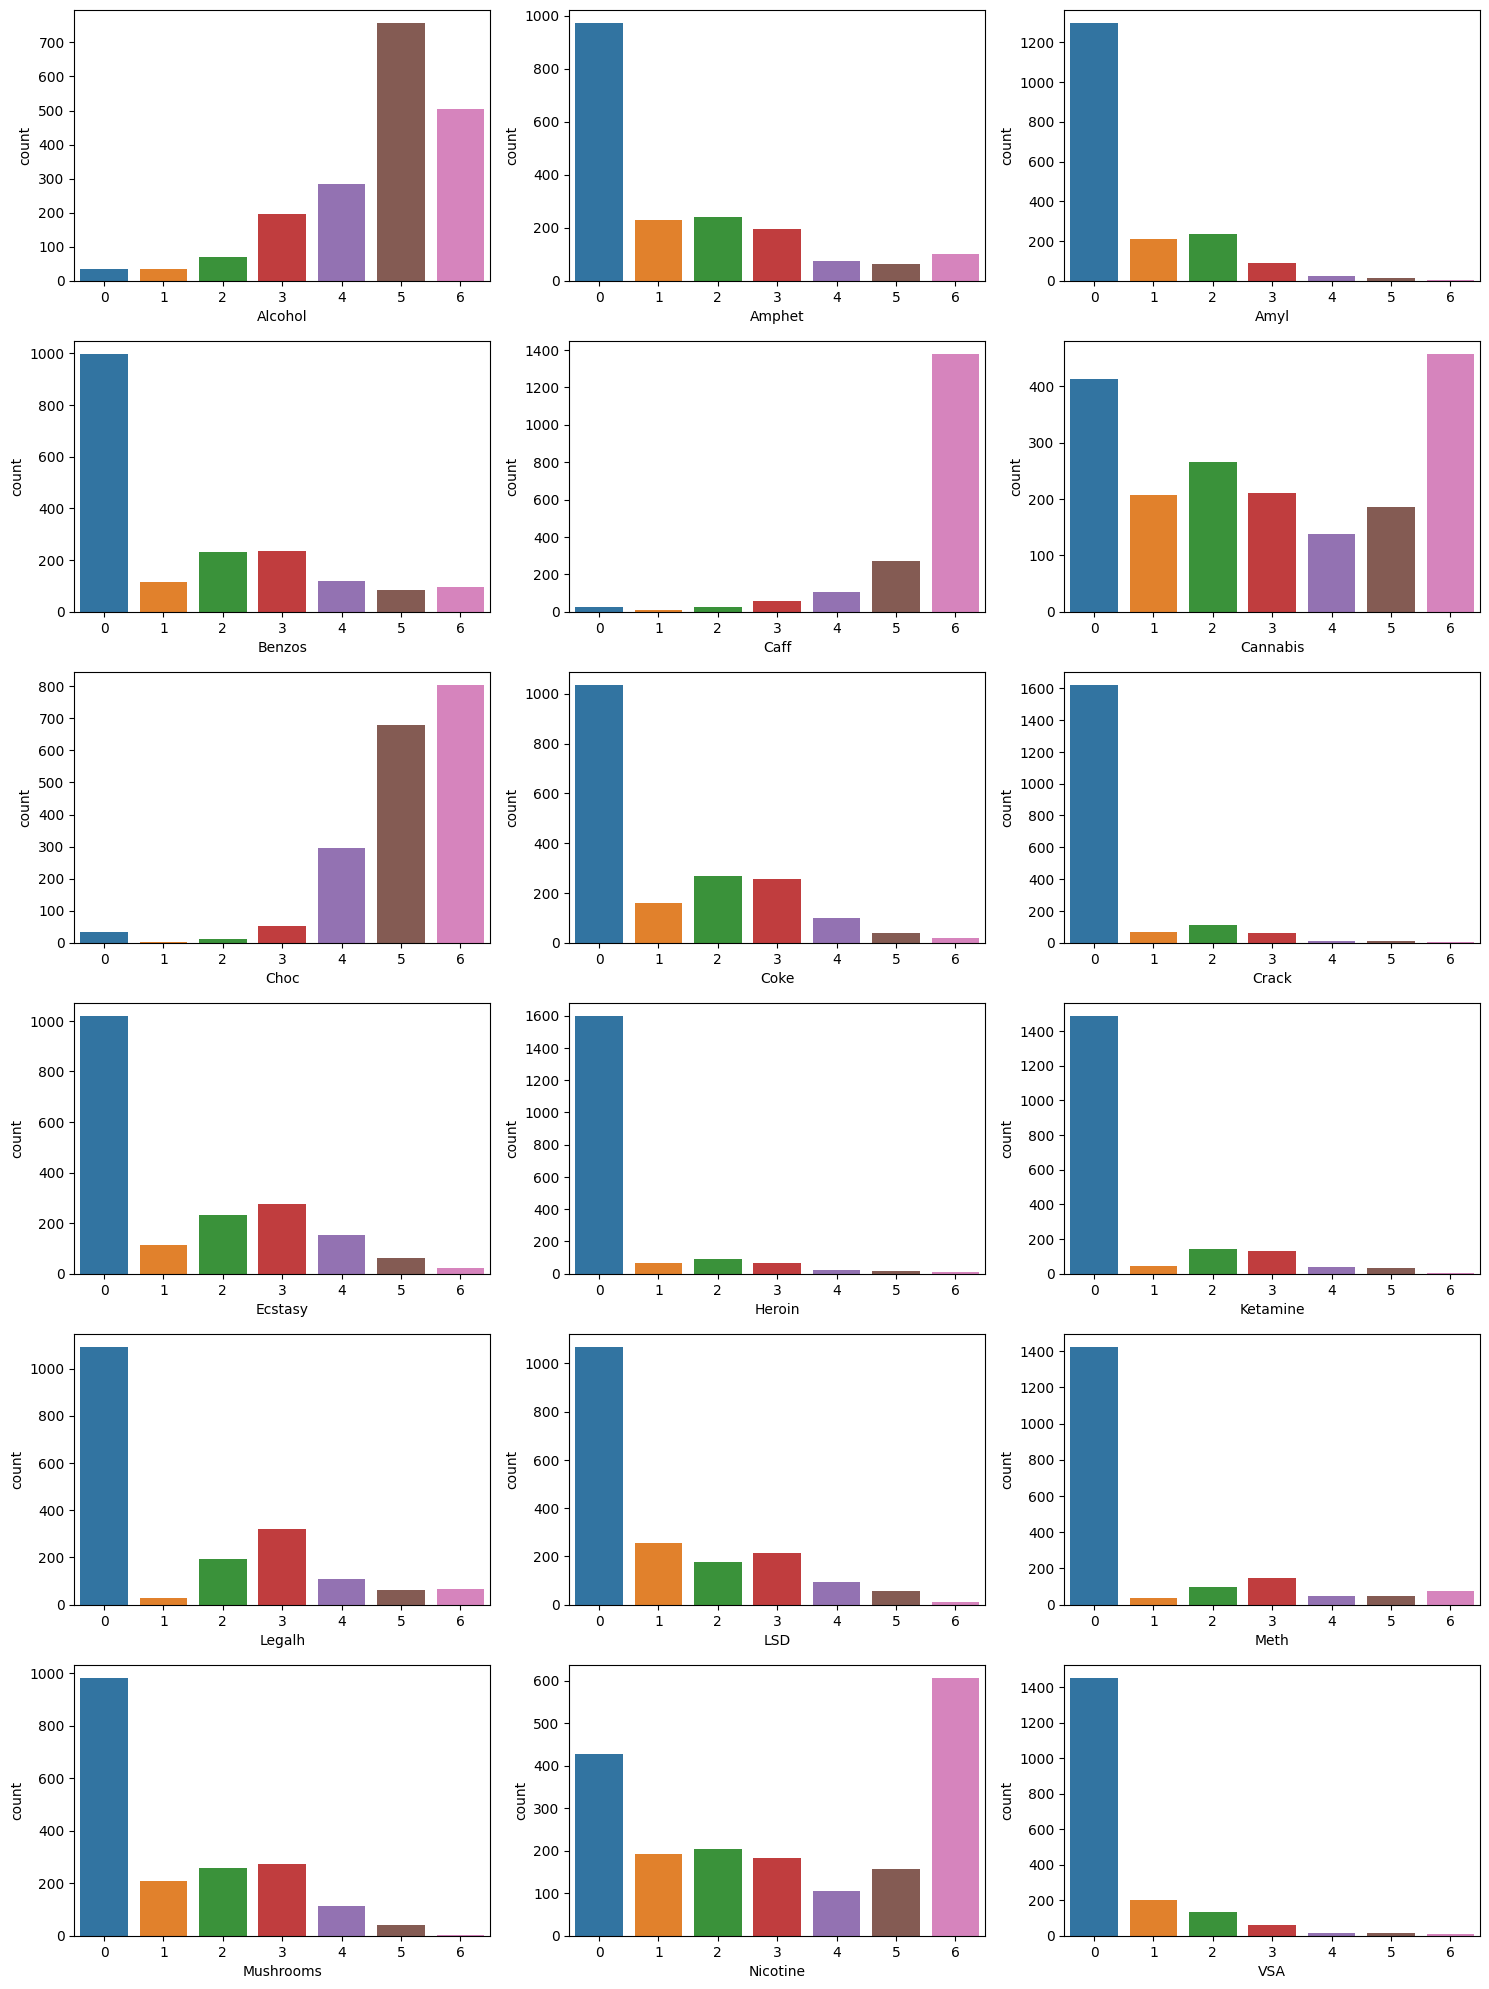

In [52]:
fig, axes = plt.subplots(6, 3, figsize = (15,20))

df = data.drop((x for x in data.columns if x not in drugs_labels), axis=1)

l = 0
for i in range(6):
    for j in range(3):
        sns.countplot(x=drugs_labels[l], data=df, ax=axes[i][j])
        l = l+1

plt.tight_layout()
plt.show()

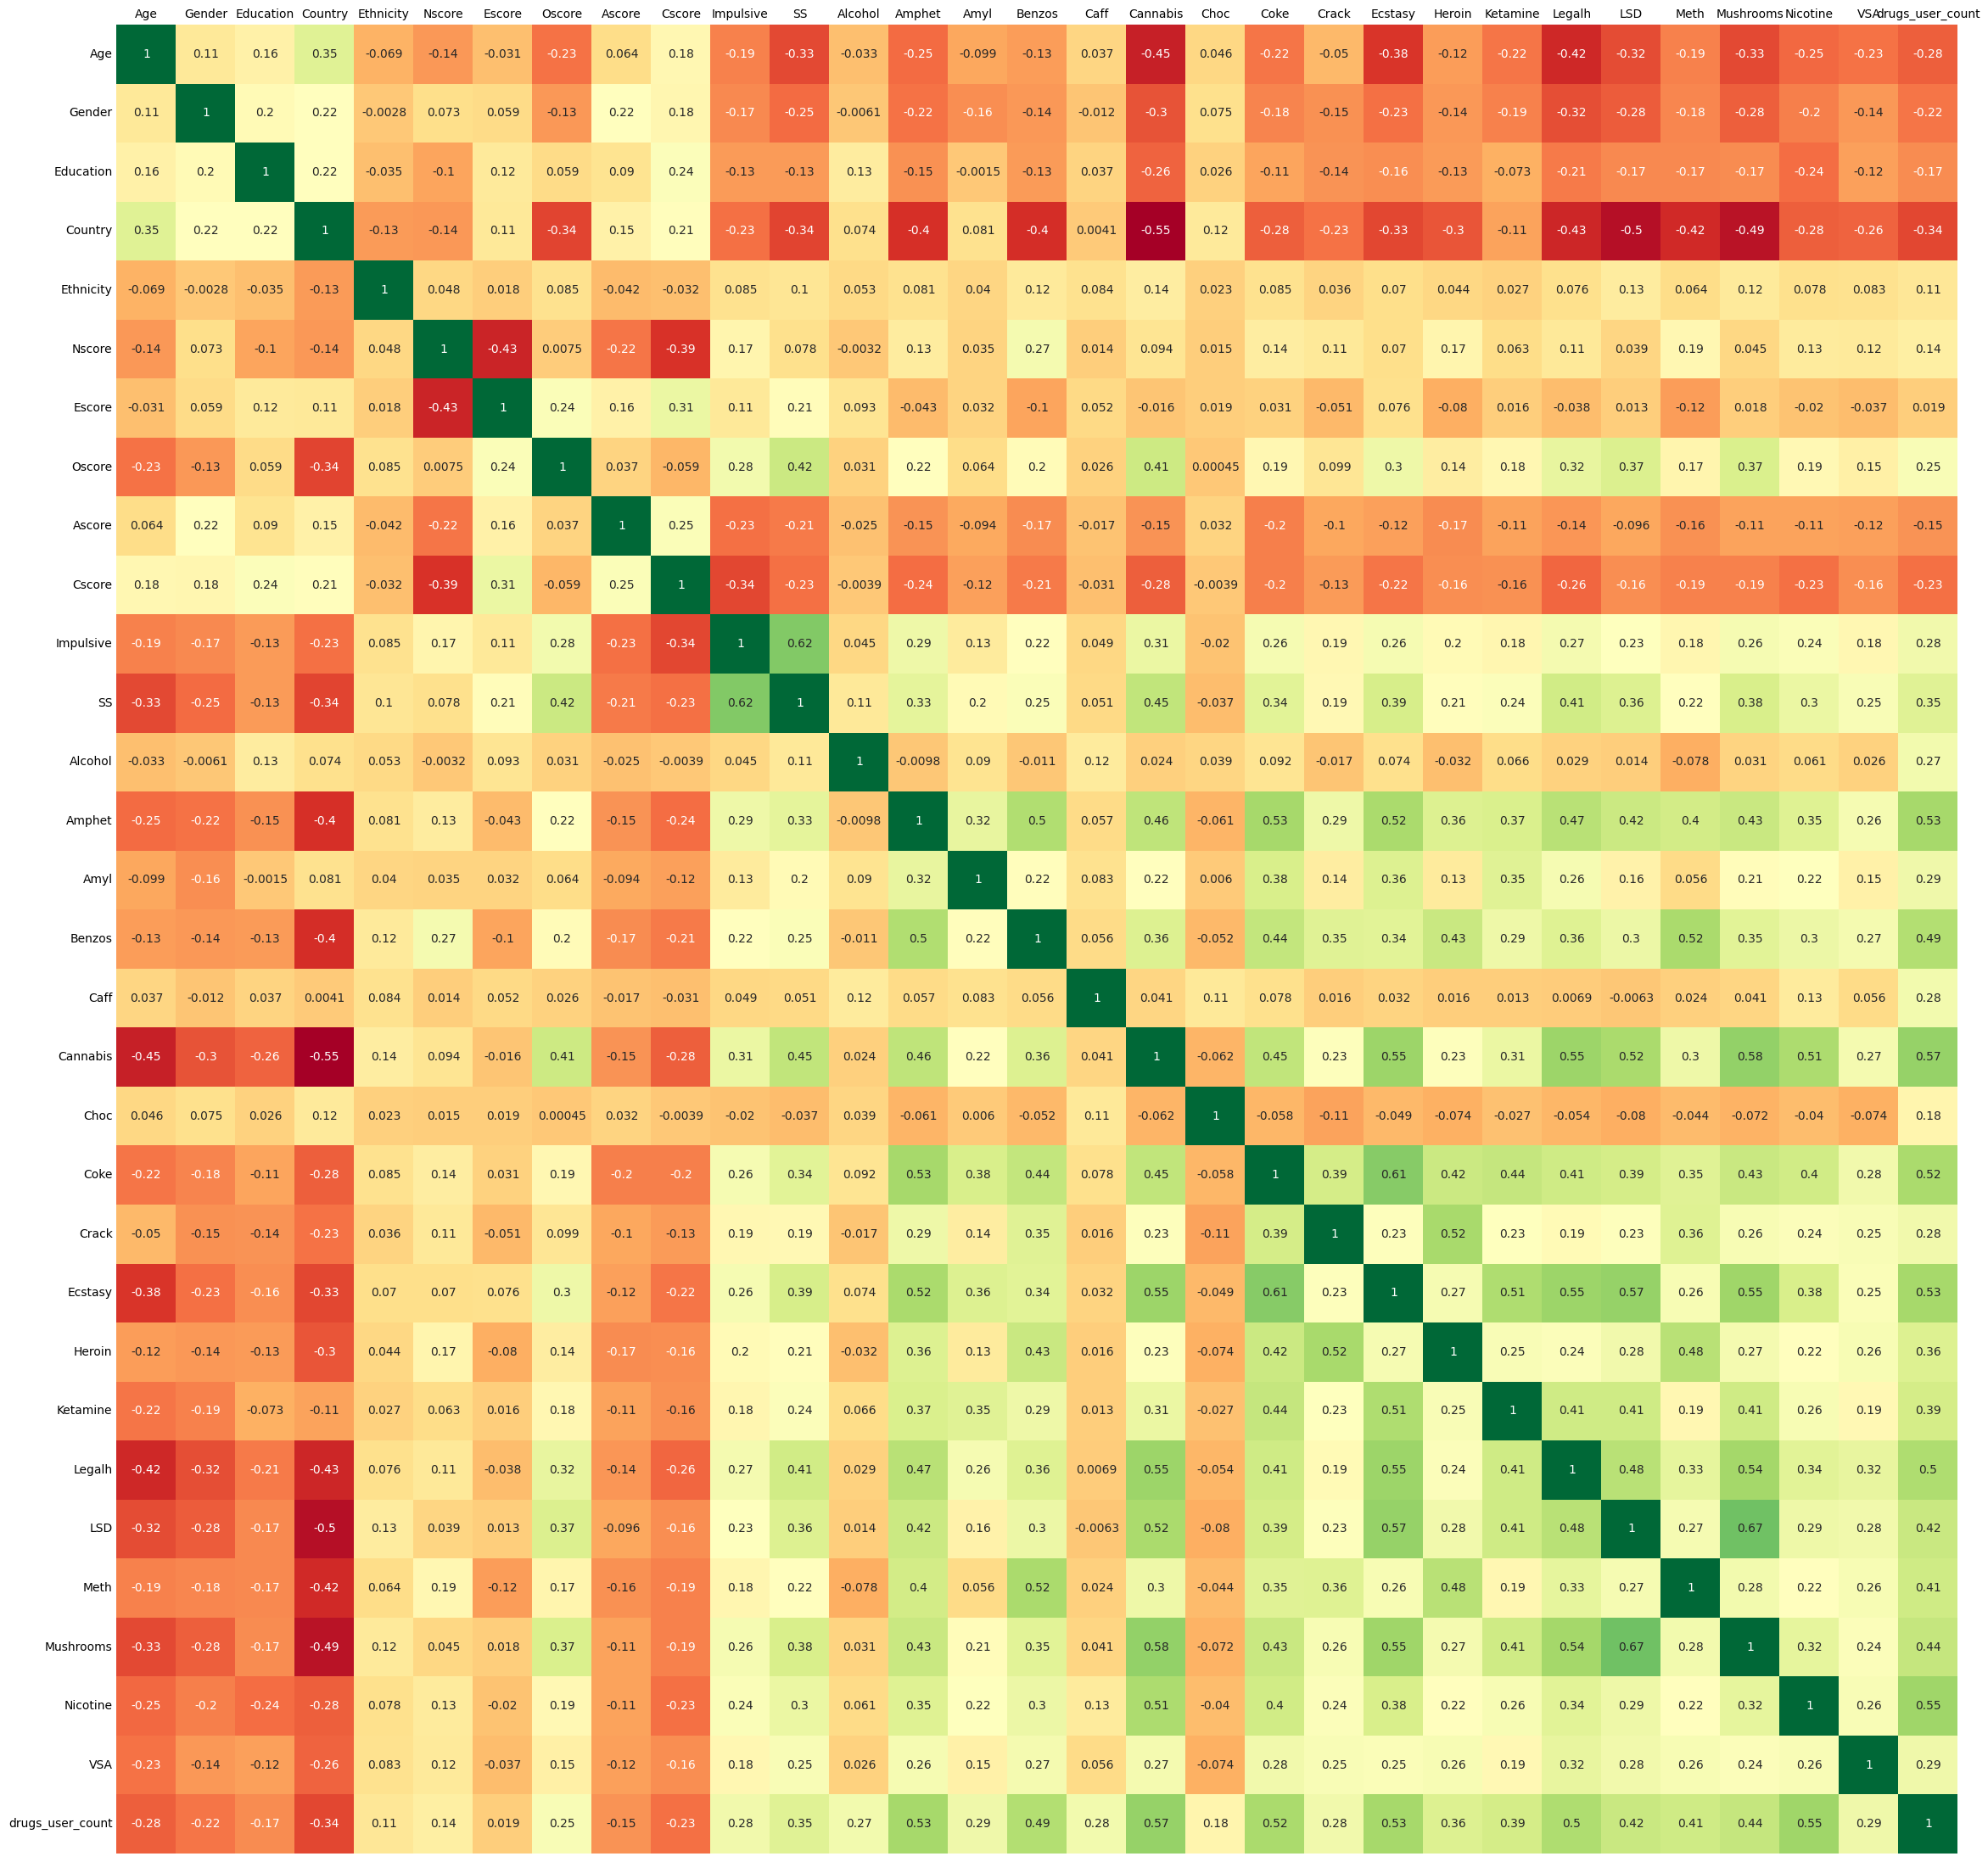

In [53]:
f, ax = plt.subplots(figsize=(28, 28))

columns_to_remove = [col for col in data.columns if any(col == label + '_user' for label in drugs_labels)]
columns_to_remove.append('ID')
sns.heatmap(data.drop(columns=columns_to_remove, axis=1).corr(), cmap = 'RdYlGn', annot=True, cbar=False)
ax.tick_params(length=0)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

Si ottengono risultati simili usando l'indice di correlazione di Pearson (default Spearmann).
```
data.drop('ID', axis=1).corr(method='pearson')
```

### Regressione

In [54]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [55]:
def print_metrics_regression(Y_train, pred_train, Y_test, pred_test):
    #sns.residplot(x=fitted_values, y=residuals, lowess=True)
    #plt.title('Grafico di Controllo Residui vs. Valori Predetti')
    #plt.xlabel('Valori Predetti')
    #plt.ylabel('Residui Standardizzati')
    #plt.show()

    #plt.scatter(fitted_values, residuals)
    #plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    #plt.title('Grafico dei Residui')
    #plt.xlabel('Valori Predetti')
    #plt.ylabel('Residui')
    #plt.show()
        
    print("Train MAE: ", mean_absolute_error(Y_train, pred_train))
    print("Train R2: ", r2_score(Y_train, pred_train))

    print("Test MAE: ", mean_absolute_error(Y_test, pred_test))
    print("Test R2: ", r2_score(Y_test, pred_test))

#### Regressione Lineare

In [86]:
def backward_elimination_linear(train_data, target_variable):
    #feature_string = '+'.join([feature for feature in train_data.columns.drop('ID') if feature != target_variable and feature != target_variable.replace("_user", "") and "_user" not in feature])
    feature_string = '+'.join([feature for feature in train_data.columns if feature != target_variable])
    formula = target_variable + " ~ " + feature_string
    model = ols(formula, train_data).fit(disp=False)          
    print("Adjusted R^2:", model.rsquared_adj)
    
    removed_features = []
    x_vars = feature_string.split("+")

    while model.pvalues.drop("Intercept").max() > 0.1:
        feature_to_remove = model.pvalues.drop("Intercept").idxmax()
        removed_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        formula = target_variable + " ~ " + '+'.join(x_vars)
        model = ols(formula, train_data).fit(disp=False) 

    print("Removed features: ", removed_features)
    return model

def linear_regression(train_data, dependent_variable):
    model = backward_elimination_linear(train_data, dependent_variable)
    print(model.summary())
    return model

In [87]:
target_variable = "drugs_user_count"
model = linear_regression(train_set[person_labels + [target_variable]], target_variable)

Adjusted R^2: 0.22402103155263575
Removed features:  ['Ascore', 'Education', 'Oscore']
                            OLS Regression Results                            
Dep. Variable:       drugs_user_count   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     48.72
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.88e-77
Time:                        17:44:58   Log-Likelihood:                -2671.1
No. Observations:                1501   AIC:                             5362.
Df Residuals:                    1491   BIC:                             5415.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [88]:
train_probs = model.predict(train_set)
train_pred = train_probs.round().astype(int)

test_probs = model.predict(test_set)
test_pred = test_probs.round().astype(int)

print_metrics_regression(train_set[target_variable], train_pred, test_set[target_variable], test_pred)

Train MAE:  1.0399733510992673
Train R2:  0.18732064349404232
Test MAE:  1.0877659574468086
Test R2:  0.1326354000527118


#### Decision Trees

In [113]:
dtc = DecisionTreeRegressor()
target_variable = [ "drugs_user_count" ]

param_grid = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth': [2, 3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [8, 16, 32, 64],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=4, scoring='r2')
grid_search.fit(train_set[person_labels], train_set[target_variable])
print("Migliori iperparametri:", grid_search.best_params_)
dtc = grid_search.best_estimator_

train_probs = dtc.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = dtc.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_regression(train_set[target_variable], train_pred, test_set[target_variable], test_pred)


Migliori iperparametri: {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 32, 'min_samples_split': 5}
Train MAE:  1.0426382411725517
Train R2:  0.21335041037935787
Test MAE:  1.1409574468085106
Test R2:  0.08564038050315315


### Principal Component Analysis

In [60]:
def show_pca_var_plot(pca):
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5,
            align='center', label='% of explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

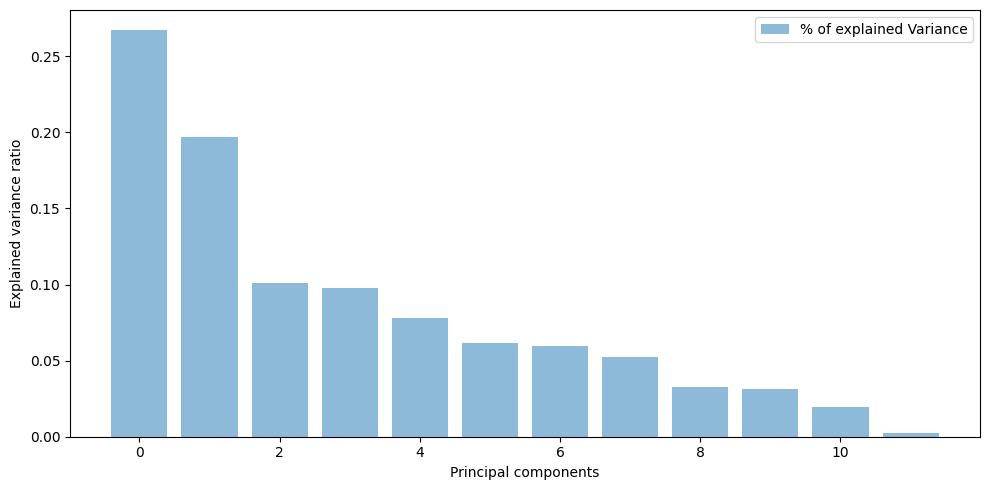

array([0.26708723, 0.46406263, 0.56489387, 0.66247699, 0.74043241,
       0.80203083, 0.86196112, 0.91432947, 0.94680093, 0.97797007,
       0.99769302, 1.        ])

In [61]:
pca=PCA()
pca.fit(train_set[person_labels])
Y=pca.transform(train_set[person_labels])
show_pca_var_plot(pca)
np.cumsum(pca.explained_variance_ratio_)

### Classificazione

#### Binaria

In [137]:
def print_metrics_binary_classification(Y_train, pred_train, Y_test, pred_test, classes=["not_user", "user"]):
    fig, axs = plt.subplots(2, 2, figsize=(13,13))

    for idx, (Y, pred, title) in enumerate(zip([Y_train, Y_test], [pred_train, pred_test], ["Train Confusion Matrix", "Test Confusion Matrix"])):
        cf_matrix = confusion_matrix(Y, pred)
        sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels=classes, cmap='cividis',
                    yticklabels=classes, ax=axs[0, idx]).set_title(title)
        
        metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
        results = [precision_score(Y, pred), 
                   recall_score(Y, pred), 
                   f1_score(Y, pred),
                   accuracy_score(Y, pred)]
        
        g = sns.barplot(x=metrics, y=results, ax=axs[1, idx])
        g.set_yticks(np.arange(0, 1.01, 0.05))
        
    print("Train Accuracy: ", accuracy_score(Y_train, pred_train))
    print("Test Accuracy: ", accuracy_score(Y_test, pred_test))

##### Regressione Logistica

In [63]:
def backward_elimination_logistic(train_data, target_variable):
    feature_string = '+'.join([feature for feature in train_data.columns.drop('ID') if feature != target_variable and feature != target_variable.replace("_user", "") and "_user" not in feature])
    formula = target_variable + " ~ " + feature_string
    model = logit(formula, train_data).fit(disp=False)          
    print("Pseudo R^2:", model.prsquared)
    
    removed_features = []
    x_vars = feature_string.split("+")

    while model.pvalues.drop("Intercept").max() > 0.1:
        feature_to_remove = model.pvalues.drop("Intercept").idxmax()
        removed_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        formula = target_variable + " ~ " + '+'.join(x_vars)
        model = logit(formula, train_data).fit(disp=False) 

    print("Removed features: ", removed_features)
    return model

def logistic_regression(train_data, dependent_variable):
    model = backward_elimination_logistic(train_data, dependent_variable)
    print(model.summary())
    return model

In [64]:
target_variable = "Cannabis_user"
model = logistic_regression(train_set, target_variable)

Pseudo R^2: 0.3543289380998701
Removed features:  ['Ethnicity', 'Cscore', 'Impulsive', 'Choc', 'Ascore', 'Crack', 'Amyl', 'VSA', 'SS', 'Caff', 'LSD', 'Escore', 'Amphet', 'Alcohol', 'Meth', 'Benzos', 'Ketamine']
                           Logit Regression Results                           
Dep. Variable:          Cannabis_user   No. Observations:                 1501
Model:                          Logit   Df Residuals:                     1488
Method:                           MLE   Df Model:                           12
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.3462
Time:                        16:36:19   Log-Likelihood:                -634.41
converged:                       True   LL-Null:                       -970.35
Covariance Type:            nonrobust   LLR p-value:                4.553e-136
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

Train Accuracy:  0.7828114590273151
Test Accuracy:  0.824468085106383


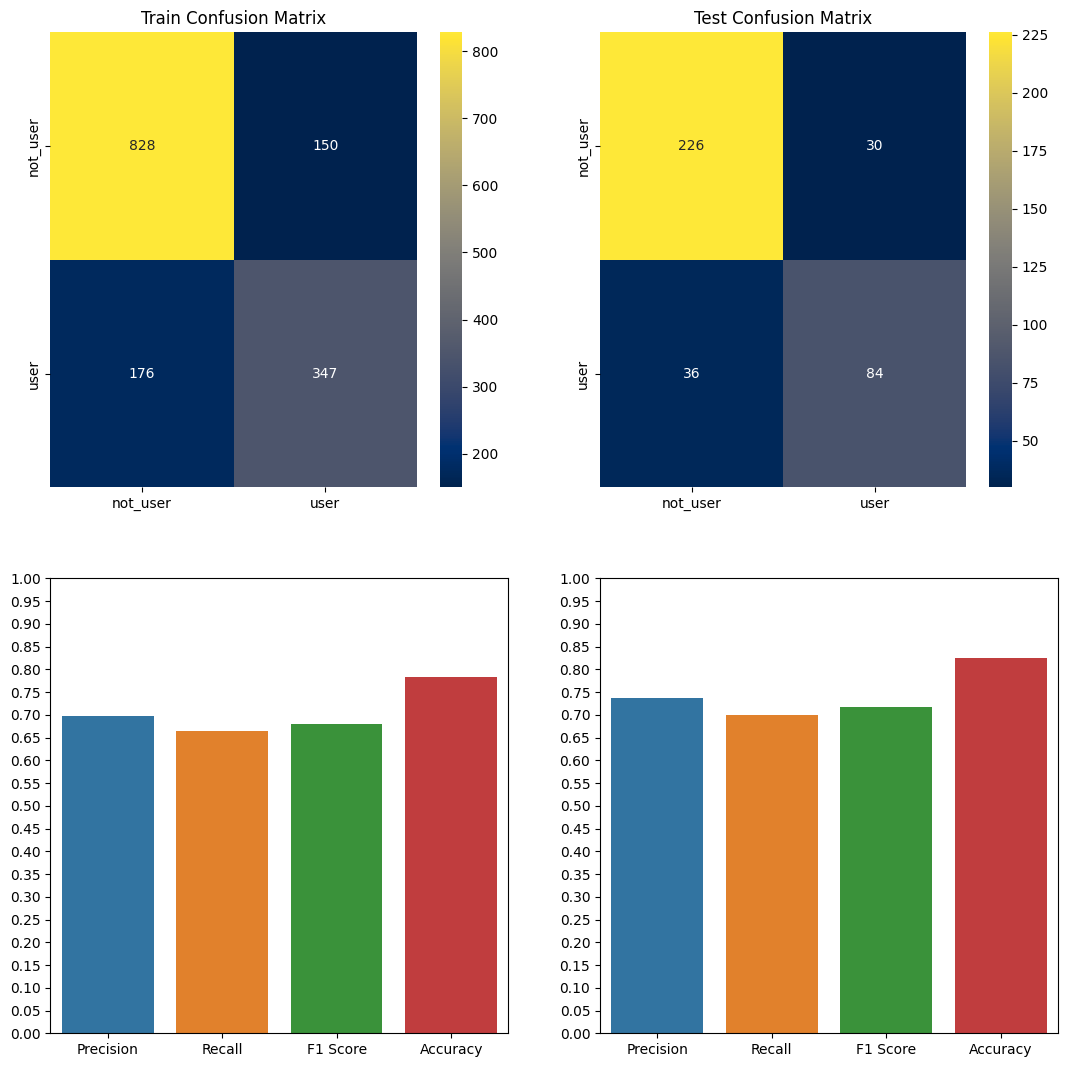

In [65]:
train_probs = model.predict(train_set)
train_pred = train_probs.round().astype(int)

test_probs = model.predict(test_set)
test_pred = test_probs.round().astype(int)

print_metrics_binary_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred)

##### SVM

Migliori iperparametri: {'C': 2, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Train Accuracy:  0.8381079280479681
Test Accuracy:  0.8111702127659575


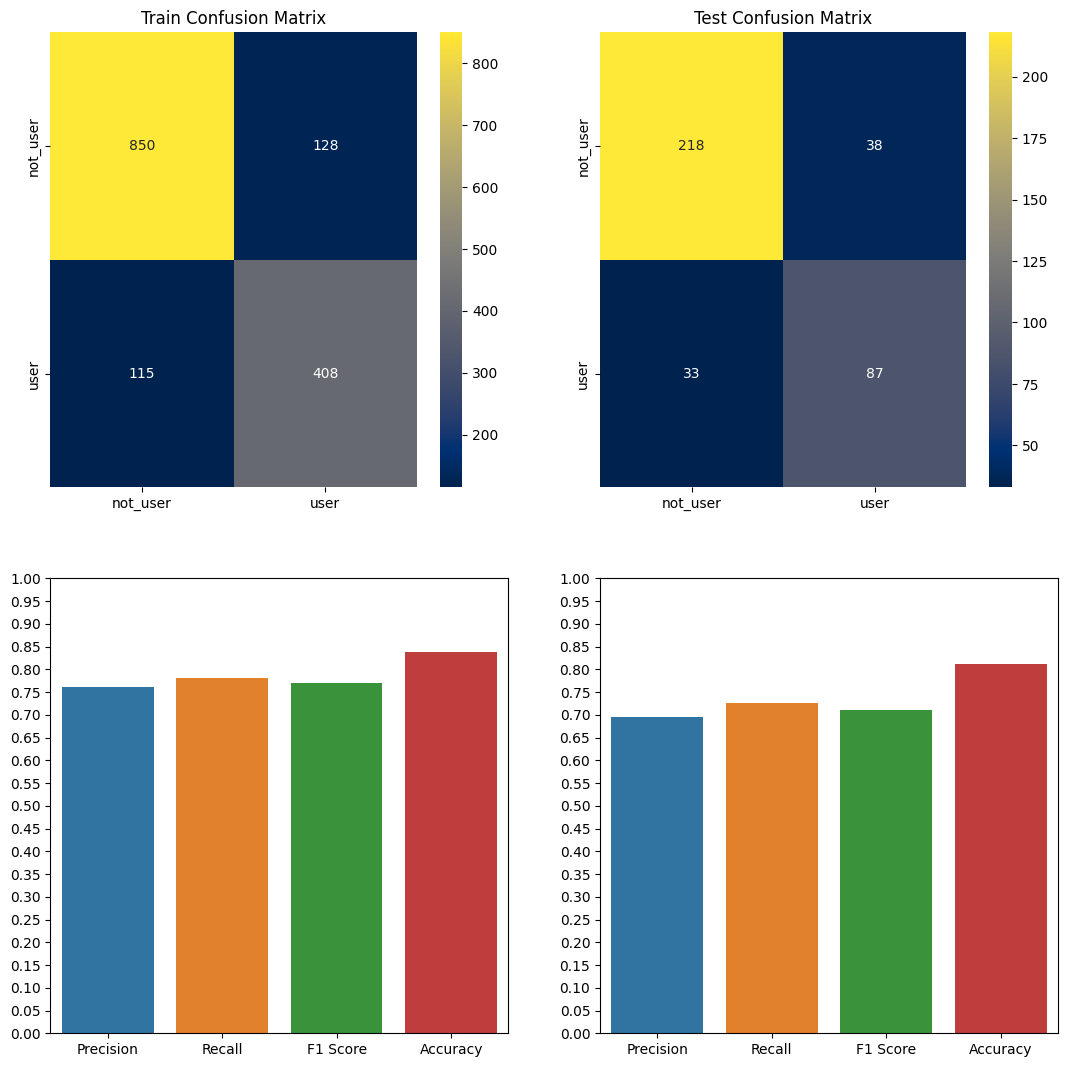

In [138]:
target_variable = [ "Cannabis_user" ]
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1, 2, 3], # soft or hard margin
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3, 4]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=4, scoring='accuracy')
grid_search.fit(train_set[person_labels], np.ravel(train_set[target_variable]))
print("Migliori iperparametri:", grid_search.best_params_)
svm = grid_search.best_estimator_

train_probs = svm.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = svm.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_binary_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred)

#### Multiclasse

In [139]:
def print_metrics_multiclass_classification(Y_train, pred_train, Y_test, pred_test, classes=range(7)):
    fig, axs = plt.subplots(2, 2, figsize=(13,13))

    for idx, (Y, pred, title) in enumerate(zip([Y_train, Y_test], [pred_train, pred_test], ["Train Confusion Matrix", "Test Confusion Matrix"])):
        cf_matrix = confusion_matrix(Y, pred)
        sns.heatmap(cf_matrix, annot=True, fmt='g', xticklabels=classes, cmap='cividis',
                    yticklabels=classes, ax=axs[0, idx]).set_title(title)
        
        metrics = ["Precision", "Recall", "F1 Score", "Accuracy"]
        results = [precision_score(Y, pred, average='macro'), 
                   recall_score(Y, pred, average='macro'), 
                   f1_score(Y, pred, average='macro'),
                   accuracy_score(Y, pred)]
        
        g = sns.barplot(x=metrics, y=results, ax=axs[1, idx])
        g.set_yticks(np.arange(0, 1.01, 0.05))
        
    print("Train Accuracy: ", accuracy_score(Y_train, pred_train))
    print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
    print("Train Classification Report: ", classification_report(Y_train, pred_train))
    print("Test Classification Report: ", classification_report(Y_test, pred_test))

##### SVM

Migliori iperparametri: {'C': 2, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

Train Accuracy:  0.5103264490339774
Test Accuracy:  0.40691489361702127
Train Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       1.00      0.04      0.08        24
           2       1.00      0.04      0.07        57
           3       0.68      0.09      0.17       158
           4       0.81      0.16      0.27       220
           5       0.48      0.93      0.63       604
           6       0.60      0.37      0.46       414

    accuracy                           0.51      1501
   macro avg       0.65      0.23      0.24      1501
weighted avg       0.60      0.51      0.44      1501

Test Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.40      0.05      0.09        39
 

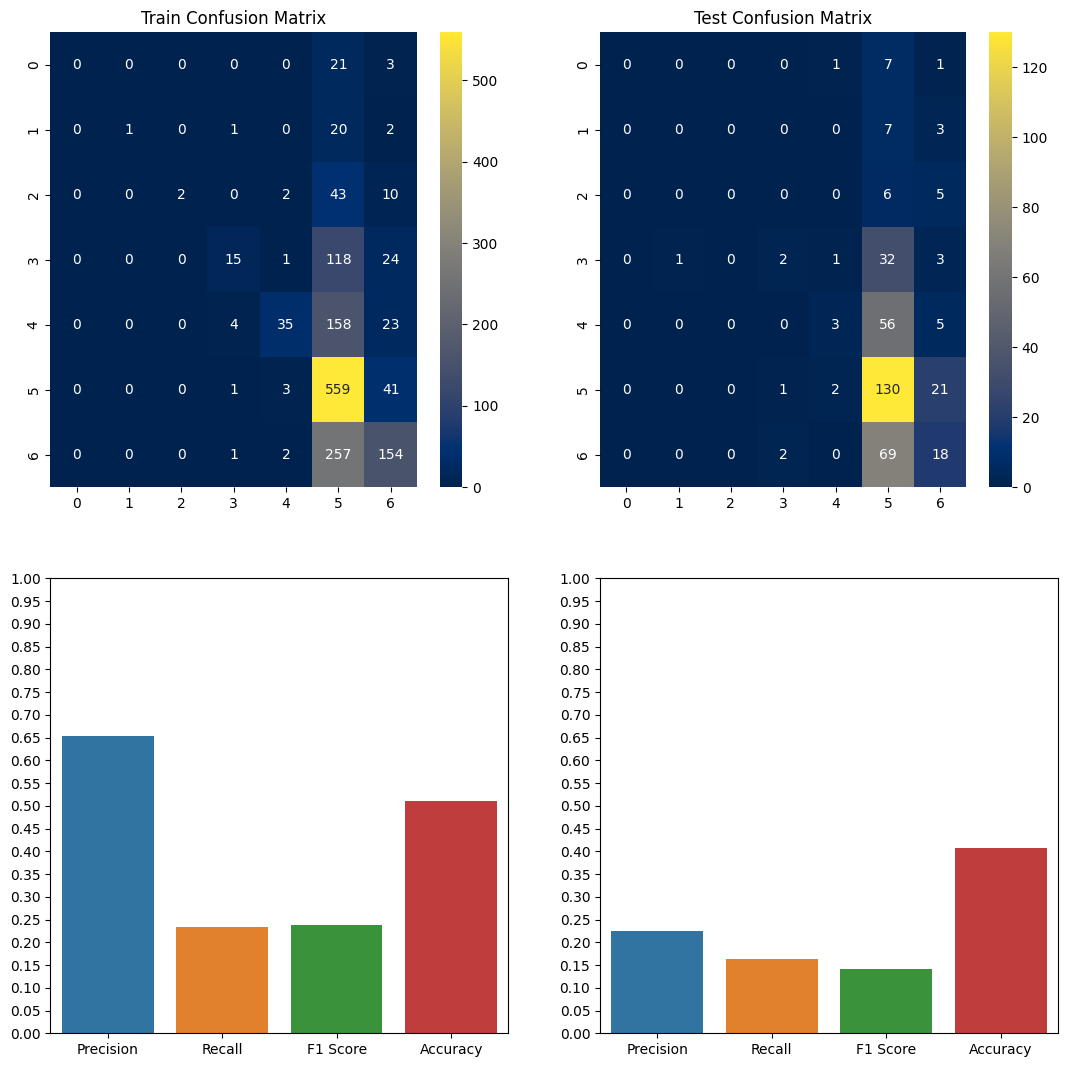

In [95]:
target_variable = [ "Alcohol" ]
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1, 2, 3], # soft or hard margin
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3, 4]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=4, scoring='accuracy')
grid_search.fit(train_set[person_labels], np.ravel(train_set[target_variable]))
print("Migliori iperparametri:", grid_search.best_params_)
svm = grid_search.best_estimator_

train_probs = svm.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = svm.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_multiclass_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred)

##### K-NN

Migliori iperparametri: {'algorithm': 'auto', 'n_neighbors': 270, 'p': 2, 'weights': 'distance'}


C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMe

Train Accuracy:  1.0
Test Accuracy:  0.4095744680851064
Train Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00       158
           4       1.00      1.00      1.00       220
           5       1.00      1.00      1.00       604
           6       1.00      1.00      1.00       414

    accuracy                           1.00      1501
   macro avg       1.00      1.00      1.00      1501
weighted avg       1.00      1.00      1.00      1501

Test Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        39
           4     

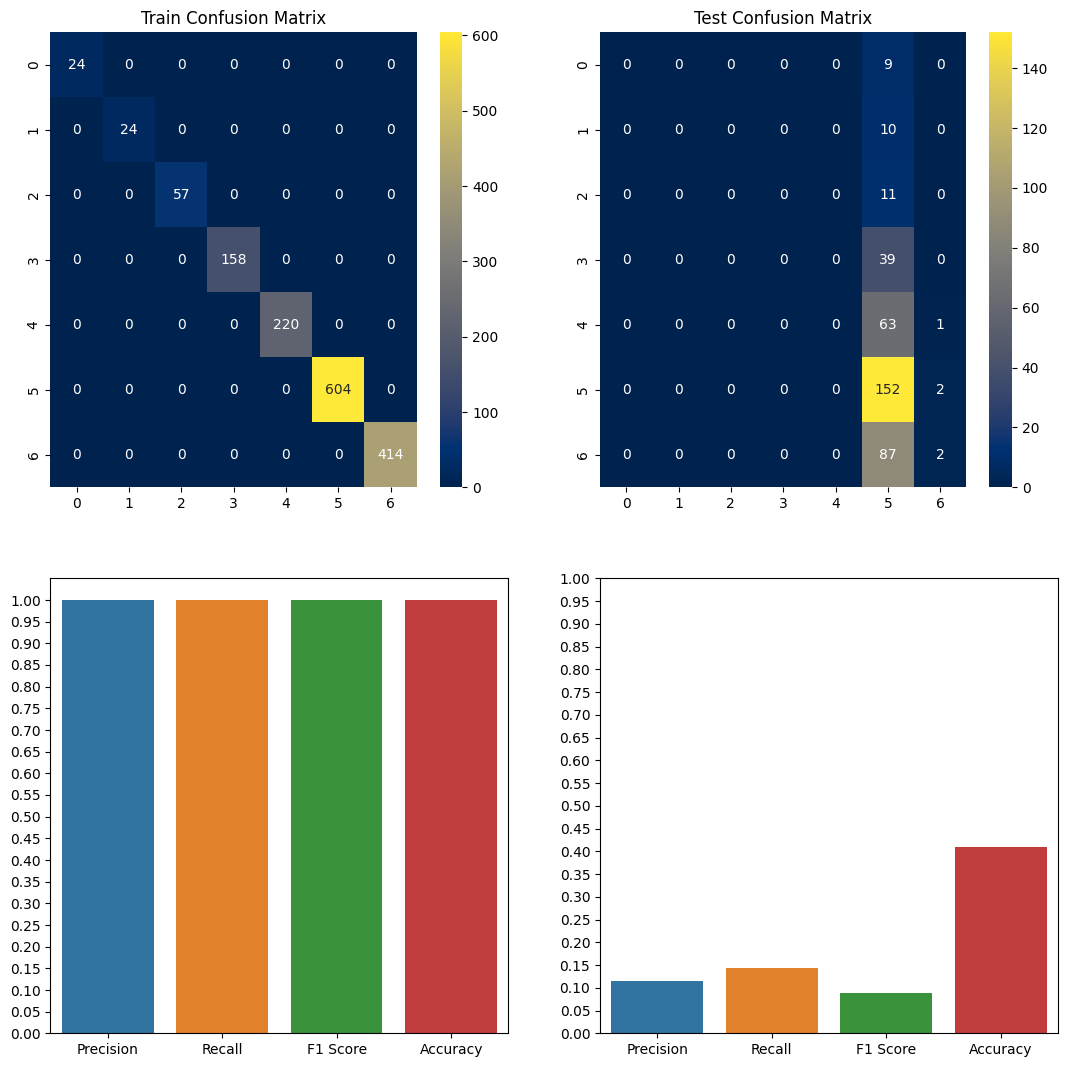

In [128]:
target_variable = [ "Alcohol" ]
param_grid = {
    'n_neighbors': range(270, 350, 7),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2], #1 Manhattan, 2 Euclidea
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_set[person_labels], np.ravel(train_set[target_variable]))
print("Migliori iperparametri:", grid_search.best_params_)
knn = grid_search.best_estimator_
#knn = KNeighborsClassifier()
#knn.fit(train_set[person_labels], train_set[target_variable])

train_probs = knn.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = knn.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_multiclass_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred)

##### Decision Tree

Migliori iperparametri: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 350, 'min_samples_split': 170, 'splitter': 'random'}


C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

Train Accuracy:  0.40772818121252496
Test Accuracy:  0.3803191489361702
Train Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        57
           3       0.33      0.08      0.13       158
           4       0.67      0.01      0.02       220
           5       0.42      0.92      0.57       604
           6       0.33      0.10      0.16       414

    accuracy                           0.41      1501
   macro avg       0.25      0.16      0.13      1501
weighted avg       0.39      0.41      0.29      1501

Test Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.09      0.03      0.04        39
 

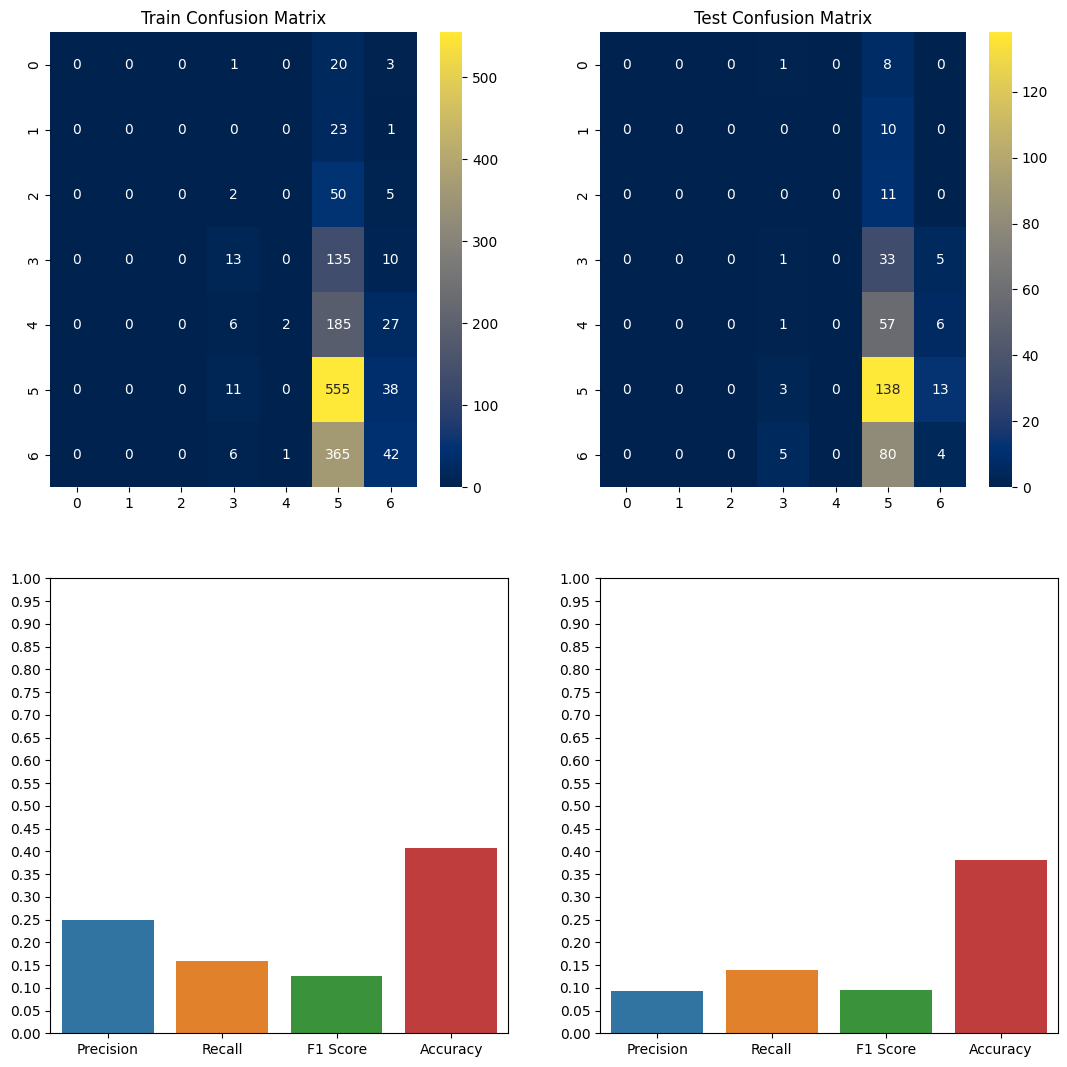

In [135]:
target_variable = [ "Alcohol" ]

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 20, 2),
    'min_samples_split': range(10, 200, 20),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': range(50, 500, 50)  # Sperimenta con valori più bassi
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=4, scoring='accuracy')
grid_search.fit(train_set[person_labels], np.ravel(train_set[target_variable]))
print("Migliori iperparametri:", grid_search.best_params_)
dtc = grid_search.best_estimator_

train_probs = dtc.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = dtc.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_multiclass_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred)


##### Random Forest

Migliori iperparametri: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 80}


C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\worna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: 

Train Accuracy:  0.7508327781479014
Test Accuracy:  0.3882978723404255
Train Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       1.00      0.17      0.29        24
           2       1.00      0.21      0.35        57
           3       0.98      0.40      0.57       158
           4       0.96      0.47      0.63       220
           5       0.66      1.00      0.79       604
           6       0.85      0.83      0.84       414

    accuracy                           0.75      1501
   macro avg       0.78      0.44      0.50      1501
weighted avg       0.80      0.75      0.72      1501

Test Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        11
           3       0.33      0.03      0.05        39
  

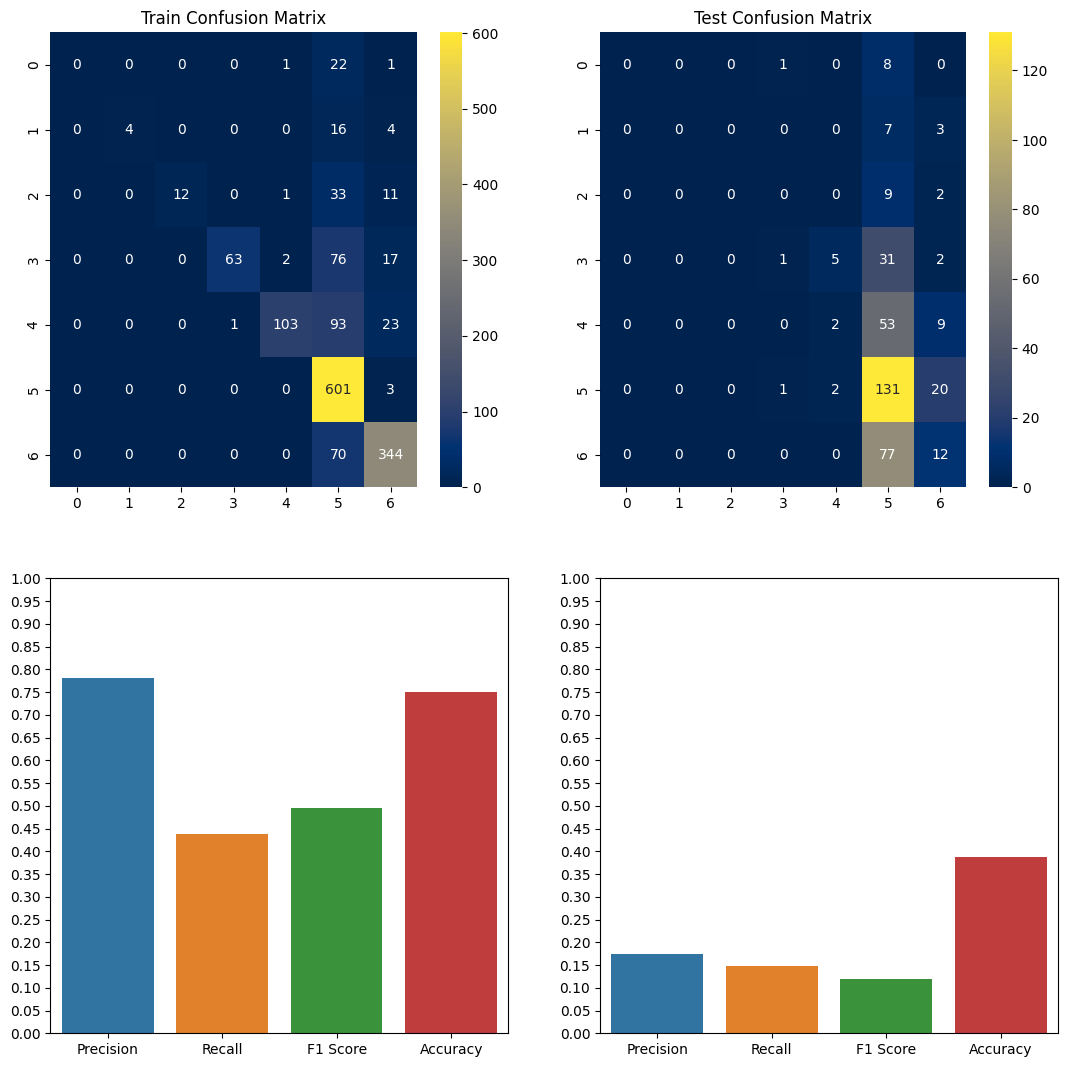

In [146]:
target_variable = [ "Alcohol" ]
param_grid = {
    'n_estimators': range(50, 100, 10),  # Numero di alberi nella foresta
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]  
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=4, scoring='accuracy')
grid_search.fit(train_set[person_labels], np.ravel(train_set[target_variable]))
print("Migliori iperparametri:", grid_search.best_params_)
rf = grid_search.best_estimator_

train_probs = rf.predict(train_set[person_labels])
train_pred = train_probs.round().astype(int)

test_probs = rf.predict(test_set[person_labels])
test_pred = test_probs.round().astype(int)

print_metrics_multiclass_classification(train_set[target_variable], train_pred, test_set[target_variable], test_pred, classes=range(7))

### Clustering

### Conclusioni